In [83]:
import pandas as pd

In [195]:
df = pd.read_csv("/Users/ambabu/Documents/PersonalDocuments/code-samples/py-data-science/pandas/2_dataframe_basics/weather_data.csv", 
                         parse_dates=[0], na_values = {
                             'windspeed': ['-1', '-9999'],
                             'event': ['-1']
                         })

In [196]:
df

,day,city,temperature,windspeed,event
0,2017-01-01,newyork,32,6.0,Rain
1,2017-01-02,newyork,36,NaN,NaN
2,2017-01-04,newyork,30,7.0,NaN
3,2017-01-05,newyork,28,4.0,Rain
4,2017-01-01,mumbai,90,8.0,Sunny
5,2017-01-02,mumbai,88,10.0,fog
6,2017-01-04,mumbai,93,13.0,fog
7,2017-01-05,mumbai,91,11.0,cloudy
8,2017-01-01,paris,45,5.0,sunny
9,2017-01-02,paris,50,15.0,rain


In [197]:
%matplotlib inline
df.set_index('day', inplace=True)
df

,city,temperature,windspeed,event
day,,,,
2017-01-01,newyork,32,6.0,Rain
2017-01-02,newyork,36,NaN,NaN
2017-01-04,newyork,30,7.0,NaN
2017-01-05,newyork,28,4.0,Rain
2017-01-01,mumbai,90,8.0,Sunny
2017-01-02,mumbai,88,10.0,fog
2017-01-04,mumbai,93,13.0,fog
2017-01-05,mumbai,91,11.0,cloudy
2017-01-01,paris,45,5.0,sunny


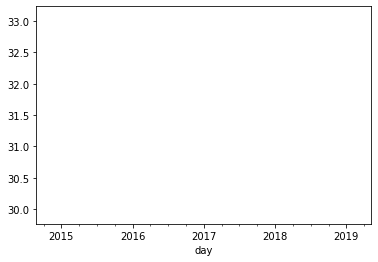

In [222]:
df1 = df[df['city'] == 'newyork']
df1.temperature.resample('M').mean().plot()

In [109]:
df.set_index('day', inplace=True)

In [117]:
df.dropna(how='any')

,temperature,windspeed,event
day,,,
2017-01-01,32,6.0,Rain
2017-01-05,32,4.0,Rain
2017-01-06,31,2.0,Sunny


In [101]:
df.interpolate(method='time', inplace=True)
df

,temperature,windspeed,event
day,,,
2017-01-01,32,6.000000,Rain
2017-01-02,35,6.333333,Sunny
2017-01-04,24,7.000000,NaN
2017-01-05,32,4.000000,Rain
2017-01-06,31,2.000000,Sunny


In [184]:
df1 = df.fillna(method='bfill', axis=0)
df1

,day,city,temperature,windspeed,event
0,2017-01-01,newyork,32,6.0,Rain
1,2017-01-02,newyork,36,7.0,Rain
2,2017-01-04,newyork,30,7.0,Rain
3,2017-01-05,newyork,28,4.0,Rain
4,2017-01-01,mumbai,90,8.0,Sunny
5,2017-01-02,mumbai,88,10.0,fog
6,2017-01-04,mumbai,93,13.0,fog
7,2017-01-05,mumbai,91,11.0,cloudy
8,2017-01-01,paris,45,5.0,sunny
9,2017-01-02,paris,50,15.0,rain


In [182]:
df1.pivot(index='city', columns='day', values='temperature')

day,2017-01-01,2017-01-02,2017-01-04,2017-01-05
city,,,,
mumbai,90,88,93,91
newyork,32,36,30,28
paris,45,50,52,47


In [186]:
df1.pivot_table(index='city', columns='day')

temperature                                   windspeed             \
day      2017-01-01 2017-01-02 2017-01-04 2017-01-05 2017-01-01 2017-01-02   
city                                                                         
mumbai           90         88         93         91        8.0       10.0   
newyork          32         36         30         28        6.0        7.0   
paris            45         50         52         47        5.0       15.0   

                               
day     2017-01-04 2017-01-05  
city                           
mumbai        13.0       11.0  
newyork        7.0        4.0  
paris         11.0       17.0

In [187]:
df1.pivot_table(index=pd.Grouper(freq='M', key='day'), columns='city', aggfunc='mean')

temperature               windspeed              
city            mumbai newyork paris    mumbai newyork paris
day                                                         
2017-01-31        90.5    31.5  48.5      10.5     6.0  12.0

In [145]:
df2 = df1.groupby('city')
df2
for key, val in df2:
    print(key)
    print(val)
    print("\n")

mumbai
         day    city  temperature  windspeed   event
4 2017-01-01  mumbai           90        8.0   Sunny
5 2017-01-02  mumbai           88       10.0     fog
6 2017-01-04  mumbai           93       13.0     fog
7 2017-01-05  mumbai           91       11.0  cloudy


newyork
         day     city  temperature  windspeed event
0 2017-01-01  newyork           32        6.0  Rain
1 2017-01-02  newyork           36        7.0  Rain
2 2017-01-04  newyork           30        7.0  Rain
3 2017-01-05  newyork           28        4.0  Rain


paris
          day   city  temperature  windspeed   event
8  2017-01-01  paris           45        5.0   sunny
9  2017-01-02  paris           50       15.0    rain
10 2017-01-04  paris           52       11.0     fog
11 2017-01-05  paris           47       17.0  cloudy




In [167]:
df1.describe()

,temperature,windspeed
count,12.000000,12.00000
mean,56.833333,9.50000
std,26.034360,4.05642
min,28.000000,4.00000
25%,35.000000,6.75000
50%,48.500000,9.00000
75%,88.500000,11.50000
max,93.000000,17.00000


In [172]:
idx = df2.temperature.transform(max) == df1.temperature
df1[idx]

,day,city,temperature,windspeed,event
1,2017-01-02,newyork,36,7.0,Rain
6,2017-01-04,mumbai,93,13.0,fog
10,2017-01-04,paris,52,11.0,fog


In [163]:
df2.agg({
    'windspeed':{
        'max_speed': 'max',
        'min_speed': 'min',
        'avg_speed': 'mean'
},
    'temperature':{
        'max_temperature': 'max',
        'min_temperature': 'min',
        'avg_temperature': 'mean'
    }
})

windspeed                         temperature                  \
        max_speed min_speed avg_speed max_temperature min_temperature   
city                                                                    
mumbai       13.0       8.0      10.5              93              88   
newyork       7.0       4.0       6.0              36              28   
paris        17.0       5.0      12.0              52              45   

                         
        avg_temperature  
city                     
mumbai             90.5  
newyork            31.5  
paris              48.5

In [65]:
df.fillna({
    'windspeed':0,
    'event':'No Event'
}, inplace=True)

NameError: name 'df1' is not defined

In [5]:
weather_df.shape

(6, 4)

In [6]:
weather_df.head(1)

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain


In [7]:
weather_df.tail(1)

,day,temperature,windspeed,event
5,1/6/2017,31,2,Sunny


In [8]:
weather_df.columns

Index(['day', 'temperature', 'windspeed', 'event'], dtype='object')

In [9]:
weather_df['day']

0    1/1/2017
1    1/2/2017
2    1/3/2017
3    1/4/2017
4    1/5/2017
5    1/6/2017
Name: day, dtype: object

In [10]:
weather_df.day

0    1/1/2017
1    1/2/2017
2    1/3/2017
3    1/4/2017
4    1/5/2017
5    1/6/2017
Name: day, dtype: object

In [11]:
weather_df.temperature.max()

35

In [12]:
weather_df[weather_df.temperature >= 32]

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
4,1/5/2017,32,4,Rain


In [139]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
animal_df = pd.DataFrame({'Max Speed': [390., 350., 30., 20.]}, index=index)
animal_df

Max Speed
Animal Type              
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

In [141]:
animal_df.groupby(level=1).mean()

,Max Speed
Type,
Captive,210.0
Wild,185.0


In [178]:
mdf1 = pd.DataFrame({
    'city': ['New York', 'Delhi', 'Paris', 'Mumbai'],
    'humidity': [5, 14, 10, 23]
})

mdf2 = pd.DataFrame({
    'city': ['Delhi', 'New York', 'Paris', 'Mumbai'],
    'temperature': [35, 13, 10, 30]
})

merge_df = pd.merge(mdf1, mdf2, on='city', how='inner')
merge_df

,city,humidity,temperature
0,New York,5,13
1,Delhi,14,35
2,Paris,10,10
3,Mumbai,23,30
